In [75]:
# allow jupyter notebook to print all the interactive output 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [76]:
# postcodes should be deleted
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
# import missingno as msno
df = pd.read_csv("immoweb_data_final.csv")
df

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Open_fire,...,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift,province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0,Brussel,Ukkel
3,289000.0,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,West-Vlaanderen,Zande
4,NaN,8900,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West-Vlaanderen,Sint-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,295000.0,6747,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,NaN,...,1.0,1600.0,1600.0,1809.0,4.0,NaN,NaN,NaN,Luxemburg,Saint-léger
25877,448000.0,9880,HOUSE,HOUSE,GOOD,4.0,169.0,False,NaN,NaN,...,NaN,NaN,NaN,770.0,NaN,NaN,NaN,NaN,Oost-Vlaanderen,Poeke
25878,350000.0,1070,APARTMENT,APARTMENT,NaN,1.0,140.0,False,NaN,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,Brussel,Anderlecht
25879,225000.0,7700,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,0.0,NaN,...,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,Henegouwen,Moeskroen


In [77]:
df.shape

(25881, 22)

In [78]:
df.Price.dtypes

dtype('float64')

In [79]:
df.dtypes

Price                        float64
Locality                      object
Type_of_Property              object
Subtype_of_Property           object
State_of_the_Building         object
Number_of_Rooms              float64
Living_Area                  float64
Fully_Equipped_Kitchen          bool
Furnished                    float64
Open_fire                    float64
Terrace                      float64
Terrace_Area                 float64
Garden                       float64
Garden_Area                  float64
Surface_of_the_Land          float64
Surface_area_plot_of_land    float64
Number_of_Facades            float64
Swimming_Pool                float64
Disabled_Access              float64
Lift                         float64
province                      object
Municipality                  object
dtype: object

In [80]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [81]:
df.shape

(24039, 22)

In [82]:
df.rename(columns={'province' :'Province'},inplace=True)
df.rename(columns={'Locality' :'Postal_code'},inplace=True)
df.head(3)

,Price,Postal_code,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Open_fire,...,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift,Province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0,Brussel,Ukkel


In [83]:
# Move column: 'Province' next to 'Postal_code'
third_col = df.pop("Province")

df.insert(2, "Province", third_col)
df.head(3)

,Price,Postal_code,Province,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,...,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift,Municipality
0,475000.0,1800,Vlaams-Brabant,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vilvoorde
1,895000.0,2000,Antwerpen,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antwerpen
2,685000.0,1180,Brussel,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,...,55.0,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0,Ukkel


In [84]:
# Move column: 'Province' next to 'Postal_code'
fourth_col = df.pop("Municipality")

df.insert(3, "Municipality", fourth_col)
df.head(3)

,Price,Postal_code,Province,Municipality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,...,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift
0,475000.0,1800,Vlaams-Brabant,Vilvoorde,APARTMENT,LOFT,NaN,3.0,400.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,895000.0,2000,Antwerpen,Antwerpen,APARTMENT,DUPLEX,NaN,3.0,286.0,True,...,1.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,685000.0,1180,Brussel,Ukkel,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,...,1.0,55.0,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0


In [85]:
# Drop columns with only 1 unique value

df.describe(include='object') 

df.drop(columns=['Furnished','Surface_area_plot_of_land']) #,inplace=True)
df.shape


,Postal_code,Province,Municipality,Type_of_Property,Subtype_of_Property,State_of_the_Building
count,24039,24039,24039,24039,24039,19862
unique,1005,12,952,4,25,6
top,8300,West-Vlaanderen,Westkapelle,HOUSE,HOUSE,GOOD
freq,945,4621,945,12751,9493,9117


,Price,Postal_code,Province,Municipality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift
0,475000.0,1800,Vlaams-Brabant,Vilvoorde,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,895000.0,2000,Antwerpen,Antwerpen,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,1.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,685000.0,1180,Brussel,Ukkel,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,1.0,55.0,NaN,NaN,NaN,4.0,0.0,0.0,1.0
3,289000.0,8680,West-Vlaanderen,Zande,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,8900,West-Vlaanderen,Sint-Jan,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,799000.0,9000,Oost-Vlaanderen,Gent,HOUSE,EXCEPTIONAL_PROPERTY,GOOD,5.0,330.0,False,NaN,NaN,NaN,1.0,69.0,69.0,NaN,0.0,0.0,0.0
25876,295000.0,6747,Luxemburg,Saint-léger,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,1.0,30.0,1.0,1600.0,1600.0,4.0,NaN,NaN,NaN
25878,350000.0,1070,Brussel,Anderlecht,APARTMENT,APARTMENT,NaN,1.0,140.0,False,1.0,1.0,10.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0
25879,225000.0,7700,Henegouwen,Moeskroen,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,NaN,1.0,4.0,NaN,NaN,NaN,2.0,0.0,0.0,0.0


(24039, 22)

In [86]:
df.isna().sum()

Price                          548
Postal_code                      0
Province                         0
Municipality                     0
Type_of_Property                 0
Subtype_of_Property              0
State_of_the_Building         4177
Number_of_Rooms                547
Living_Area                   1397
Fully_Equipped_Kitchen           0
Furnished                    13500
Open_fire                    23025
Terrace                       8183
Terrace_Area                 14257
Garden                       18647
Garden_Area                  18647
Surface_of_the_Land          18647
Surface_area_plot_of_land    11288
Number_of_Facades             7430
Swimming_Pool                15091
Disabled_Access              12971
Lift                          9732
dtype: int64

In [87]:
# fill missing value as "None" for columns: Price
df.Price = df.Price.fillna('None')

In [88]:
df.isna().sum()

Price                            0
Postal_code                      0
Province                         0
Municipality                     0
Type_of_Property                 0
Subtype_of_Property              0
State_of_the_Building         4177
Number_of_Rooms                547
Living_Area                   1397
Fully_Equipped_Kitchen           0
Furnished                    13500
Open_fire                    23025
Terrace                       8183
Terrace_Area                 14257
Garden                       18647
Garden_Area                  18647
Surface_of_the_Land          18647
Surface_area_plot_of_land    11288
Number_of_Facades             7430
Swimming_Pool                15091
Disabled_Access              12971
Lift                          9732
dtype: int64

In [89]:
# fill missing value as "None" for columns: Number_of_rooms
df.Number_of_Rooms = df.Number_of_Rooms.fillna('None')

In [90]:
df.isna().sum()

Price                            0
Postal_code                      0
Province                         0
Municipality                     0
Type_of_Property                 0
Subtype_of_Property              0
State_of_the_Building         4177
Number_of_Rooms                  0
Living_Area                   1397
Fully_Equipped_Kitchen           0
Furnished                    13500
Open_fire                    23025
Terrace                       8183
Terrace_Area                 14257
Garden                       18647
Garden_Area                  18647
Surface_of_the_Land          18647
Surface_area_plot_of_land    11288
Number_of_Facades             7430
Swimming_Pool                15091
Disabled_Access              12971
Lift                          9732
dtype: int64

In [91]:
df

,Price,Postal_code,Province,Municipality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,...,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift
0,475000.0,1800,Vlaams-Brabant,Vilvoorde,APARTMENT,LOFT,NaN,3.0,400.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,895000.0,2000,Antwerpen,Antwerpen,APARTMENT,DUPLEX,NaN,3.0,286.0,True,...,1.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,685000.0,1180,Brussel,Ukkel,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,...,1.0,55.0,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0
3,289000.0,8680,West-Vlaanderen,Zande,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,None,8900,West-Vlaanderen,Sint-Jan,HOUSE_GROUP,HOUSE_GROUP,NaN,None,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,799000.0,9000,Oost-Vlaanderen,Gent,HOUSE,EXCEPTIONAL_PROPERTY,GOOD,5.0,330.0,False,...,NaN,NaN,1.0,69.0,69.0,364.0,NaN,0.0,0.0,0.0
25876,295000.0,6747,Luxemburg,Saint-léger,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,...,1.0,30.0,1.0,1600.0,1600.0,1809.0,4.0,NaN,NaN,NaN
25878,350000.0,1070,Brussel,Anderlecht,APARTMENT,APARTMENT,NaN,1.0,140.0,False,...,1.0,10.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0
25879,225000.0,7700,Henegouwen,Moeskroen,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,...,1.0,4.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0


In [17]:
# I would separate Brussels from other cities and build two different graphs
locality = ds["province"].value_counts().head(15)
#locality.index
locality

#!!! Bruxelles and Brussel!!! What is the differrence?

NameError: name 'ds' is not defined

In [79]:
# I would separate Brussels from other cities and build two different graphs
locality = ds["Municipality"].value_counts().head(15)
#locality.index
locality

#!!! Bruxelles and Brussel!!! What is the differrence?

Municipality
Westkapelle               1005
Antwerpen                  795
Gent                       604
Brussel                    509
Zandvoorde                 423
Ukkel                      405
Elsene                     400
Rocourt                    302
Anderlecht                 256
Sint-lambrechts-woluwe     255
Schaarbeek                 226
Uitkerke                   224
Aalst                      216
Sint-pieters-woluwe        215
Deurne                     213
Name: count, dtype: int64

In [80]:
ds["Subtype_of_Property"].value_counts()

Subtype_of_Property
HOUSE                   9825
APARTMENT               8744
VILLA                   1249
APARTMENT_GROUP          950
APARTMENT_BLOCK          588
DUPLEX                   585
GROUND_FLOOR             561
MIXED_USE_BUILDING       543
HOUSE_GROUP              534
PENTHOUSE                500
FLAT_STUDIO              434
EXCEPTIONAL_PROPERTY     235
MANSION                  202
TOWN_HOUSE               173
SERVICE_FLAT             142
BUNGALOW                 140
COUNTRY_COTTAGE          123
LOFT                     102
KOT                       67
TRIPLEX                   65
FARMHOUSE                 56
CHALET                    31
MANOR_HOUSE               15
CASTLE                     9
OTHER_PROPERTY             8
Name: count, dtype: int64

In [81]:
ds["Number_of_Rooms"].value_counts()

Number_of_Rooms
3.0     7699
2.0     7413
4.0     3713
1.0     2524
5.0     1402
6.0      609
0.0      591
7.0      186
8.0      111
9.0       42
10.0      38
12.0      18
11.0      12
16.0      11
13.0       8
20.0       3
22.0       3
15.0       3
14.0       2
18.0       2
24.0       2
21.0       1
25.0       1
46.0       1
17.0       1
40.0       1
Name: count, dtype: int64

In [82]:
ds["Living_Area"].value_counts()

Living_Area
100.0     401
90.0      325
85.0      322
150.0     314
110.0     295
         ... 
472.0       1
777.0       1
696.0       1
1745.0      1
1180.0      1
Name: count, Length: 736, dtype: int64

In [83]:
# we can check correlation between equipped and State of Building
ds["Fully_Equipped_Kitchen"].value_counts()

Fully_Equipped_Kitchen
False    21273
True      4608
Name: count, dtype: int64

In [84]:
# we can check correlation between furnished and State of Building
ds["Furnished"].value_counts()

Furnished
0.0    10141
1.0      956
Name: count, dtype: int64

In [85]:
# candidate to DELETE
ds["Open_fire"].value_counts()

Open_fire
1.0       994
2.0        28
3.0         4
4.0         2
7.0         1
1000.0      1
Name: count, dtype: int64

In [86]:
ds["Terrace"].value_counts()

Terrace
1.0    16503
Name: count, dtype: int64

In [87]:
ds["Terrace_Area"].value_counts()

Terrace_Area
20.0      630
10.0      609
15.0      487
8.0       430
30.0      426
         ... 
122.0       1
3749.0      1
540.0       1
134.0       1
124.0       1
Name: count, Length: 188, dtype: int64

In [88]:
ds

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Open_fire,...,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift,province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0,Brussel,Ukkel
3,289000.0,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,West-Vlaanderen,Zande
4,NaN,8900,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West-Vlaanderen,Sint-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,295000.0,6747,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,NaN,...,1.0,1600.0,1600.0,1809.0,4.0,NaN,NaN,NaN,Luxemburg,Saint-léger
25877,448000.0,9880,HOUSE,HOUSE,GOOD,4.0,169.0,False,NaN,NaN,...,NaN,NaN,NaN,770.0,NaN,NaN,NaN,NaN,Oost-Vlaanderen,Poeke
25878,350000.0,1070,APARTMENT,APARTMENT,NaN,1.0,140.0,False,NaN,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,Brussel,Anderlecht
25879,225000.0,7700,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,0.0,NaN,...,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,Henegouwen,Moeskroen


In [89]:
ds["Garden"].value_counts()

Garden
1.0    5582
Name: count, dtype: int64

In [90]:
# candidate to DELETE
ds["Garden_Area"].value_counts()

Garden_Area
100.0      158
50.0       135
200.0      123
1.0        119
400.0       91
          ... 
1324.0       1
1085.0       1
1334.0       1
50000.0      1
432.0        1
Name: count, Length: 1026, dtype: int64

In [91]:
# candidate to DELETE
ds["Surface_of_the_Land"].value_counts()

Surface_of_the_Land
100.0      158
50.0       135
200.0      123
1.0        119
400.0       91
          ... 
1324.0       1
1085.0       1
1334.0       1
50000.0      1
432.0        1
Name: count, Length: 1026, dtype: int64

In [92]:
# candidate to DELETE
ds["Surface_area_plot_of_land"].value_counts()

Surface_area_plot_of_land
0.0        790
200.0       99
120.0       84
180.0       72
170.0       71
          ... 
6303.0       1
14299.0      1
23912.0      1
1829.0       1
1809.0       1
Name: count, Length: 2573, dtype: int64

In [93]:
ds["Number_of_Facades"].value_counts()

Number_of_Facades
2.0     8683
4.0     4552
3.0     3908
1.0       72
5.0        4
6.0        3
15.0       1
Name: count, dtype: int64

In [94]:
# candidate to DELETE
ds["Swimming_Pool"].value_counts()

Swimming_Pool
0.0    8727
1.0     627
Name: count, dtype: int64

In [95]:
# candidate to DELETE, but we can check correlation between equipped kitchen and furhinsed, so I proposed to stay
ds["State_of_the_Building"].value_counts()

State_of_the_Building
GOOD              9460
AS_NEW            5255
TO_RENOVATE       2335
TO_BE_DONE_UP     1927
JUST_RENOVATED    1530
TO_RESTORE          95
Name: count, dtype: int64

In [96]:
ds

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Open_fire,...,Garden,Garden_Area,Surface_of_the_Land,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Disabled_Access,Lift,province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,0.0,0.0,1.0,Brussel,Ukkel
3,289000.0,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,West-Vlaanderen,Zande
4,NaN,8900,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West-Vlaanderen,Sint-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,295000.0,6747,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,NaN,...,1.0,1600.0,1600.0,1809.0,4.0,NaN,NaN,NaN,Luxemburg,Saint-léger
25877,448000.0,9880,HOUSE,HOUSE,GOOD,4.0,169.0,False,NaN,NaN,...,NaN,NaN,NaN,770.0,NaN,NaN,NaN,NaN,Oost-Vlaanderen,Poeke
25878,350000.0,1070,APARTMENT,APARTMENT,NaN,1.0,140.0,False,NaN,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,Brussel,Anderlecht
25879,225000.0,7700,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,0.0,NaN,...,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,Henegouwen,Moeskroen


In [97]:
# to delete columns
df = ds.drop(columns = ["Open_fire", "Swimming_Pool", "Disabled_Access", "Surface_area_plot_of_land", "Lift"])
# df = data.drop(columns = ["Open_fire"], ["Number_of_Fasades"]) # to name dataset for our analysis
# data.drop(columns = ["Open_fire"], ["Number_of_Fasades"], inplace = True) - to inplace our dataset 
df


,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Number_of_Facades,province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,1.0,30.0,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,1.0,55.0,NaN,NaN,NaN,4.0,Brussel,Ukkel
3,289000.0,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,1.0,4.0,NaN,NaN,NaN,NaN,West-Vlaanderen,Zande
4,NaN,8900,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West-Vlaanderen,Sint-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,295000.0,6747,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,1.0,30.0,1.0,1600.0,1600.0,4.0,Luxemburg,Saint-léger
25877,448000.0,9880,HOUSE,HOUSE,GOOD,4.0,169.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oost-Vlaanderen,Poeke
25878,350000.0,1070,APARTMENT,APARTMENT,NaN,1.0,140.0,False,NaN,1.0,10.0,NaN,NaN,NaN,2.0,Brussel,Anderlecht
25879,225000.0,7700,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,0.0,1.0,4.0,NaN,NaN,NaN,2.0,Henegouwen,Moeskroen


In [98]:
# check duplicates !!!!HOW CAN WE SEE THEM?!!!
df.duplicated().sum()

1887

In [99]:
# to delete duplicates
df.drop_duplicates(inplace = True)

In [100]:
# check duplicates
df.duplicated().sum()

0

In [101]:
df

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Number_of_Facades,province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,1.0,30.0,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,1.0,55.0,NaN,NaN,NaN,4.0,Brussel,Ukkel
3,289000.0,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,1.0,4.0,NaN,NaN,NaN,NaN,West-Vlaanderen,Zande
4,NaN,8900,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West-Vlaanderen,Sint-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,799000.0,9000,HOUSE,EXCEPTIONAL_PROPERTY,GOOD,5.0,330.0,False,NaN,NaN,NaN,1.0,69.0,69.0,NaN,Oost-Vlaanderen,Gent
25876,295000.0,6747,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,1.0,30.0,1.0,1600.0,1600.0,4.0,Luxemburg,Saint-léger
25878,350000.0,1070,APARTMENT,APARTMENT,NaN,1.0,140.0,False,NaN,1.0,10.0,NaN,NaN,NaN,2.0,Brussel,Anderlecht
25879,225000.0,7700,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,0.0,1.0,4.0,NaN,NaN,NaN,2.0,Henegouwen,Moeskroen


In [102]:
df.shape

(23994, 17)

In [103]:
# to count total amount of any values
# df.isna().sum().sum()

In [104]:
# ???df.dropna(inplace = True)

In [105]:
# ???df.isna().sum().sum()

In [106]:
# to COUNT and CORT values
df["Subtype_of_Property"].value_counts().sort_values(ascending = False)

Subtype_of_Property
HOUSE                   9474
APARTMENT               8360
VILLA                   1192
APARTMENT_BLOCK          574
DUPLEX                   566
GROUND_FLOOR             539
MIXED_USE_BUILDING       530
PENTHOUSE                482
FLAT_STUDIO              411
APARTMENT_GROUP          285
HOUSE_GROUP              262
EXCEPTIONAL_PROPERTY     224
MANSION                  197
TOWN_HOUSE               166
SERVICE_FLAT             136
BUNGALOW                 134
COUNTRY_COTTAGE          119
LOFT                      99
TRIPLEX                   65
KOT                       62
FARMHOUSE                 55
CHALET                    31
MANOR_HOUSE               14
CASTLE                     9
OTHER_PROPERTY             8
Name: count, dtype: int64

In [107]:
# to COUNT and CORT values (discending) and look at TOP 7
df["Subtype_of_Property"].value_counts().sort_values(ascending = False).head(15)

Subtype_of_Property
HOUSE                   9474
APARTMENT               8360
VILLA                   1192
APARTMENT_BLOCK          574
DUPLEX                   566
GROUND_FLOOR             539
MIXED_USE_BUILDING       530
PENTHOUSE                482
FLAT_STUDIO              411
APARTMENT_GROUP          285
HOUSE_GROUP              262
EXCEPTIONAL_PROPERTY     224
MANSION                  197
TOWN_HOUSE               166
SERVICE_FLAT             136
Name: count, dtype: int64

<Axes: xlabel='Subtype_of_Property'>

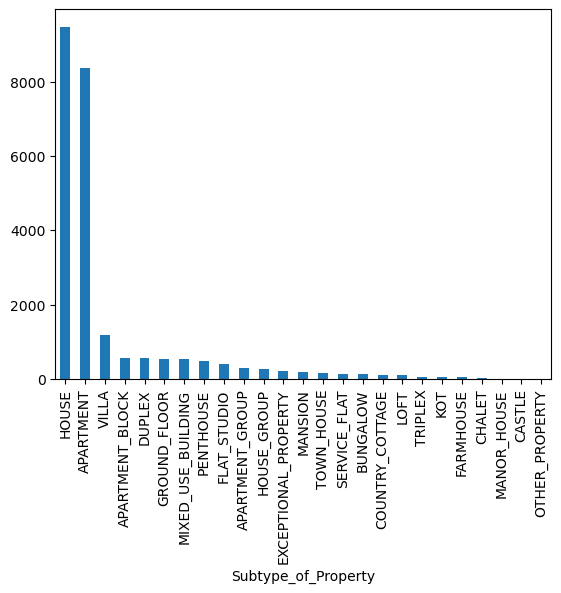

In [108]:
# to COUNT and CORT values (discending) and look at plot var
df["Subtype_of_Property"].value_counts().sort_values(ascending = False).plot(kind = "bar")

In [109]:
import matplotlib.pyplot as plt

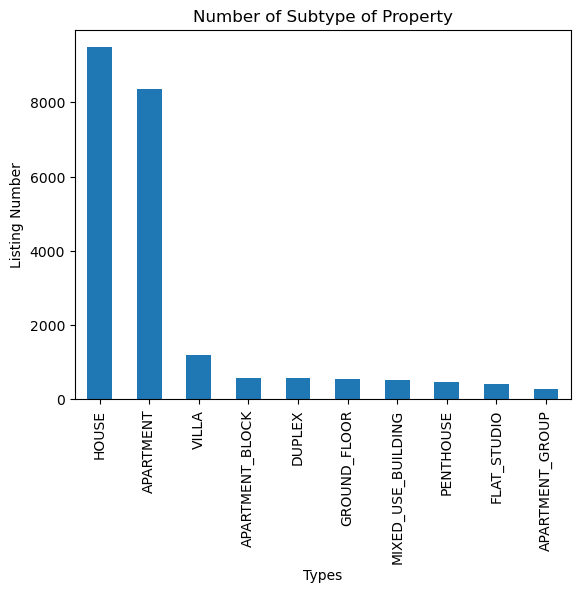

In [110]:
# use matplotlib.pyplot to apdate our bar
df["Subtype_of_Property"].value_counts().sort_values(ascending = False).head(10).plot(kind = "bar")
plt.title("Number of Subtype of Property")
plt.ylabel("Listing Number")
plt.xlabel("Types")
plt.show()

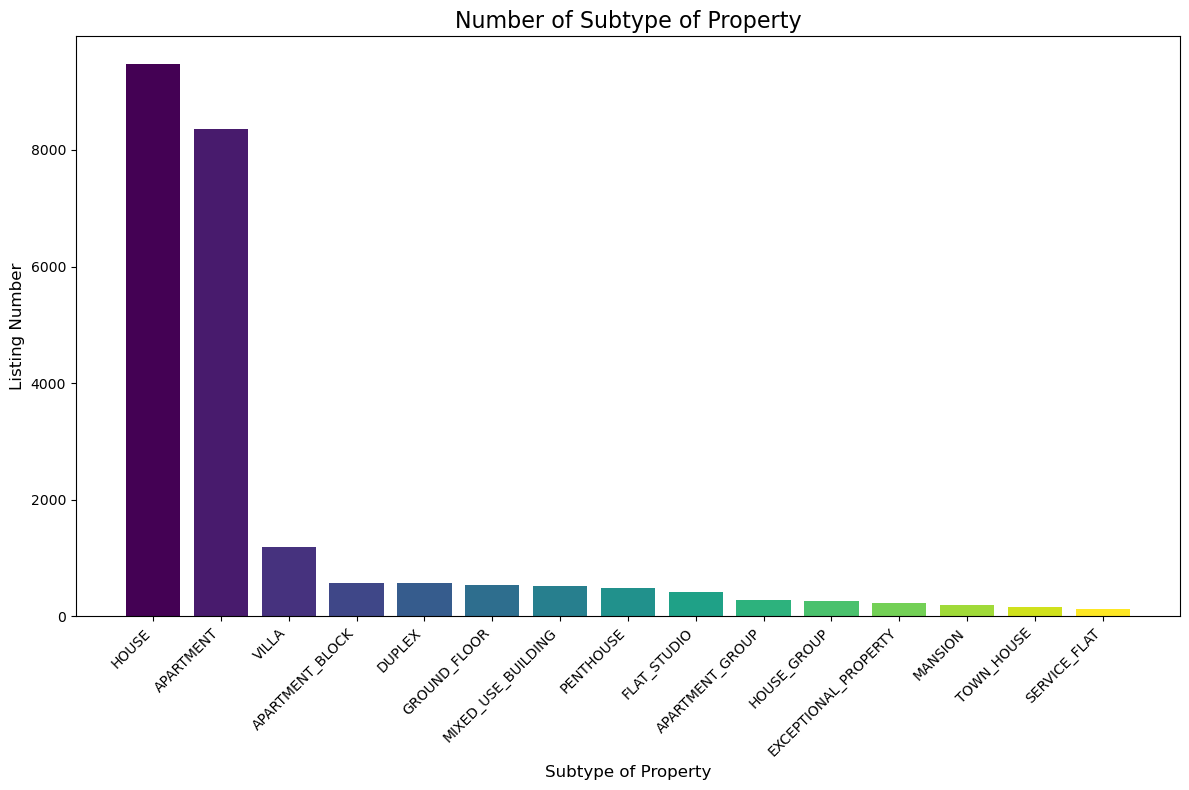

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Data
subtype_data = {
    "HOUSE": 9474,
    "APARTMENT": 8360,
    "VILLA": 1192,
    "APARTMENT_BLOCK": 574,
    "DUPLEX": 566,
    "GROUND_FLOOR": 539,
    "MIXED_USE_BUILDING": 530,
    "PENTHOUSE": 482,
    "FLAT_STUDIO": 411,
    "APARTMENT_GROUP": 285,
    "HOUSE_GROUP": 262,
    "EXCEPTIONAL_PROPERTY": 224,
    "MANSION": 197,
    "TOWN_HOUSE": 166,
    "SERVICE_FLAT": 136,
}

# Convert to sorted lists for plotting
subtypes = list(subtype_data.keys())
counts = list(subtype_data.values())

# Sorting the data by counts
sorted_indices = np.argsort(counts)[::-1]  # Descending order
subtypes = [subtypes[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Creating the bar chart with a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(subtypes)))

plt.figure(figsize=(12, 8))
plt.bar(subtypes, counts, color=colors)

plt.title("Number of Subtype of Property", fontsize=16)
plt.ylabel("Listing Number", fontsize=12)
plt.xlabel("Subtype of Property", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [113]:
df.groupby(["Locality", "Subtype_of_Property"])["Price"].mean()

Locality  Subtype_of_Property
03001     APARTMENT               299000.0
03150     HOUSE                   289000.0
03170     VILLA                   540000.0
03186     PENTHOUSE               234900.0
03187     VILLA                   349450.0
                                   ...    
9991      HOUSE_GROUP                  NaN
          VILLA                   778000.0
9992      FARMHOUSE               672500.0
          HOUSE                   972000.0
          VILLA                  1095000.0
Name: Price, Length: 4423, dtype: float64

In [114]:
df.groupby(["Locality", "Subtype_of_Property"])["Price"].mean().reset_index()

,Locality,Subtype_of_Property,Price
0,03001,APARTMENT,299000.0
1,03150,HOUSE,289000.0
2,03170,VILLA,540000.0
3,03186,PENTHOUSE,234900.0
4,03187,VILLA,349450.0
...,...,...,...
4418,9991,HOUSE_GROUP,NaN
4419,9991,VILLA,778000.0
4420,9992,FARMHOUSE,672500.0
4421,9992,HOUSE,972000.0


In [115]:
# to find correlation between valeus and Price
df.select_dtypes(include=["number"])

,Price,Number_of_Rooms,Living_Area,Furnished,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Number_of_Facades
0,475000.0,3.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,895000.0,3.0,286.0,NaN,1.0,30.0,NaN,NaN,NaN,NaN
2,685000.0,2.0,127.0,NaN,1.0,55.0,NaN,NaN,NaN,4.0
3,289000.0,3.0,120.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25875,799000.0,5.0,330.0,NaN,NaN,NaN,1.0,69.0,69.0,NaN
25876,295000.0,5.0,260.0,NaN,1.0,30.0,1.0,1600.0,1600.0,4.0
25878,350000.0,1.0,140.0,NaN,1.0,10.0,NaN,NaN,NaN,2.0
25879,225000.0,3.0,112.0,0.0,1.0,4.0,NaN,NaN,NaN,2.0


In [117]:
# full line to find correlation between valeus and Price
df.select_dtypes(include=["number"]).corr()["Price"]

Price                  1.000000
Number_of_Rooms        0.369129
Living_Area            0.440590
Furnished              0.048203
Terrace                     NaN
Terrace_Area           0.154283
Garden                      NaN
Garden_Area            0.220467
Surface_of_the_Land    0.220467
Number_of_Facades      0.191151
Name: Price, dtype: float64

In [ ]:
To create a treemap using the plotly.express library (px.treemap) with continuous color.locality
Explanation:
path=['Locality']: Specifies the hierarchy of the treemap.
values='Value': Specifies the numerical values used to size the rectangles.
color='Value': Uses the same column for color intensity.
color_continuous_scale='Viridis': Sets the color scale; you can customize it (e.g., 'Plasma', 'Cividis', etc.).
This will display a treemap where each locality is represented as a rectangle sized by the Value column and colored according to the same values.

In [119]:
df

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Furnished,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_Land,Number_of_Facades,province,Municipality
0,475000.0,1800,APARTMENT,LOFT,NaN,3.0,400.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaams-Brabant,Vilvoorde
1,895000.0,2000,APARTMENT,DUPLEX,NaN,3.0,286.0,True,NaN,1.0,30.0,NaN,NaN,NaN,NaN,Antwerpen,Antwerpen
2,685000.0,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2.0,127.0,False,NaN,1.0,55.0,NaN,NaN,NaN,4.0,Brussel,Ukkel
3,289000.0,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3.0,120.0,False,NaN,1.0,4.0,NaN,NaN,NaN,NaN,West-Vlaanderen,Zande
4,NaN,8900,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West-Vlaanderen,Sint-Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,799000.0,9000,HOUSE,EXCEPTIONAL_PROPERTY,GOOD,5.0,330.0,False,NaN,NaN,NaN,1.0,69.0,69.0,NaN,Oost-Vlaanderen,Gent
25876,295000.0,6747,HOUSE,MANSION,TO_RENOVATE,5.0,260.0,False,NaN,1.0,30.0,1.0,1600.0,1600.0,4.0,Luxemburg,Saint-léger
25878,350000.0,1070,APARTMENT,APARTMENT,NaN,1.0,140.0,False,NaN,1.0,10.0,NaN,NaN,NaN,2.0,Brussel,Anderlecht
25879,225000.0,7700,APARTMENT,APARTMENT,GOOD,3.0,112.0,False,0.0,1.0,4.0,NaN,NaN,NaN,2.0,Henegouwen,Moeskroen


In [123]:
# I would separate Brussels from other cities and build two different graphs
locality = ds["province"].value_counts().head(15)
#locality.index
locality

#!!! Bruxelles and Brussel!!! What is the differrence?

province
West-Vlaanderen    5083
Oost-Vlaanderen    4602
Antwerpen          4057
Brussel            3660
Luik               2200
Vlaams-Brabant     2030
Henegouwen         1176
Waals-Brabant       812
Luxemburg           809
Limburg             706
Namen               684
Unknown              62
Name: count, dtype: int64

In [124]:
import pandas as pd
import plotly.express as px

# Updated data
data = {
    'Locality': [
        'West-Vlaanderen', 'Oost-Vlaanderen', 'Antwerpen', 'Brussel', 'Luik',
        'Vlaams-Brabant', 'Henegouwen', 'Waals-Brabant', 'Luxemburg', 'Limburg',
        'Namen'
    ],
    'Value': [
        5083, 4602, 4057, 3660, 2200, 2030, 1176, 812, 809, 706, 
        684
    ]
}

# Creating a DataFrame
df_local = pd.DataFrame(data)
df.set_index('Locality', inplace=True)

# Create the treemap
fig = px.treemap(
    df_local.reset_index(), 
    path=['Locality'], 
    values='Value', 
    color='Value', 
    color_continuous_scale='Viridis'
)

# Show the plot
fig.show()


In [125]:
import pandas as pd
import plotly.express as px

# Updated data with groups for demonstration
data = {
    'Locality': [
        'West-Vlaanderen', 'Oost-Vlaanderen', 'Antwerpen', 'Brussel', 'Luik',
        'Vlaams-Brabant', 'Henegouwen', 'Waals-Brabant', 'Luxemburg', 'Limburg',
        'Namen'
    ],
    'Value': [
        5083, 4602, 4057, 3660, 2200, 2030, 1176, 812, 809, 706, 
        684
    ]
}

# Creating a DataFrame
df_local_II = pd.DataFrame(data)

# Create the grouped bubble chart
fig = px.scatter(
    df_local_II,
    x='Locality',           # x-axis shows the localities
    y='Value',              # y-axis shows the value
    size='Value',           # Bubble size based on the value
    hover_name='Locality',  # Display locality on hover
    title='Grouped Bubble Chart of Localities'
)

# Show the plot
fig.show()


In [126]:
# candidate to DELETE
ds["Garden_Area"].value_counts()

Garden_Area
100.0      158
50.0       135
200.0      123
1.0        119
400.0       91
          ... 
1324.0       1
1085.0       1
1334.0       1
50000.0      1
432.0        1
Name: count, Length: 1026, dtype: int64